In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
#Adafair
from AdaFair import AdaFair 

from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "Ada.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "Ada.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "Ada.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "Ada.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "Ada.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "Ada.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Adafair model
    Ada = AdaFair(n_estimators=50, saIndex=sa_index, saValue=p_Group, CSB="CSB2", c=1, use_validation=False)
    Ada.fit(X_train,y_train)
    y_predicts = Ada.predict(X_test)
    y_pred_probs = Ada.predict_proba(X_test)
    
                            
                    
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = Ada.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [4]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.5, 'accuracy': 0.892147435897436, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}
Equal opportunity
{'balanced_accuracy': 0.5, 'accuracy': 0.892147435897436, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.892147435897436, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Predictive parity
{'balanced_accuracy': 0.5, 'accuracy': 0.892147435897436, 'fairness': 0.18845243451554217, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Predictive equality
{'balanced_accuracy': 0.5, 'accuracy': 0.892147435897436, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Treatment equality

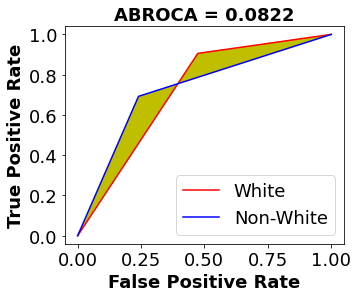

ABROCA: 0.08217183079981757


In [5]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.6130225080385852, 'accuracy': 0.6810176125244618, 'fairness': -0.05725976070890848, 'Positive_prot_pred': 0.8656429942418427, 'Positive_non_prot_pred': 0.8083832335329342, 'Negative_prot_pred': 0.1343570057581574, 'Negative_non_prot_pred': 0.19161676646706588}
Equal opportunity
{'balanced_accuracy': 0.6130225080385852, 'accuracy': 0.6810176125244618, 'fairness': 0.01636582430806255, 'TPR_protected': 0.9333333333333333, 'TPR_non_protected': 0.9169675090252708, 'TNR_protected': 0.26704545454545453, 'TNR_non_protected': 0.32589285714285715}
Equalized odds
{'balanced_accuracy': 0.6130225080385852, 'accuracy': 0.6810176125244618, 'fairness': 0.07521322690546517, 'TPR_protected': 0.9333333333333333, 'TPR_non_protected': 0.9169675090252708, 'TNR_protected': 0.26704545454545453, 'TNR_non_protected': 0.32589285714285715}
Predictive parity
{'balanced_accuracy': 0.6130225080385852, 'accuracy': 0.6810176125244618, 'fairness': 0.08680846404423637, 'TPR_pr

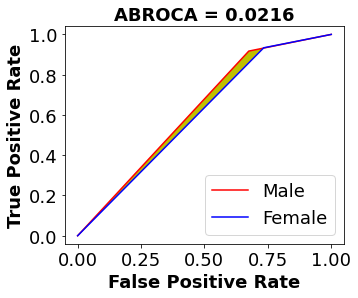

ABROCA: 0.02160913197941259


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}
Equal opportunity
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Predictive parity
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.010025062656641603, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Predictive equality
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Treatment equality
{'balanced_accuracy': 0.5, 'accuracy': 0.9, 'fairness': 0.0, 'TPR_pr

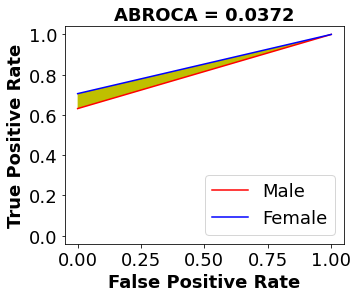

ABROCA: 0.03715170278637775


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.9343359142346634, 'accuracy': 0.9243697478991597, 'fairness': 0.14019219898247598, 'Positive_prot_pred': 0.4827586206896552, 'Positive_non_prot_pred': 0.6229508196721312, 'Negative_prot_pred': 0.5172413793103449, 'Negative_non_prot_pred': 0.3770491803278688}
Equal opportunity
{'balanced_accuracy': 0.9343359142346634, 'accuracy': 0.9243697478991597, 'fairness': 0.03379416282642089, 'TPR_protected': 0.8709677419354839, 'TPR_non_protected': 0.9047619047619048, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 1.0}
Equalized odds
{'balanced_accuracy': 0.9343359142346634, 'accuracy': 0.9243697478991597, 'fairness': 0.07083119986345798, 'TPR_protected': 0.8709677419354839, 'TPR_non_protected': 0.9047619047619048, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 1.0}
Predictive parity
{'balanced_accuracy': 0.9343359142346634, 'accuracy': 0.9243697478991597, 'fairness': 0.0357142857142857, 'TPR_protected': 0.8709677419354839, 'TPR_no

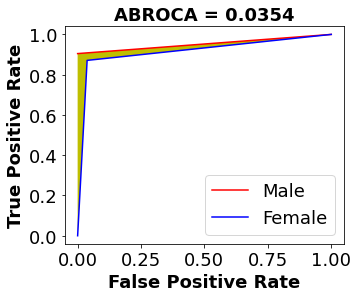

ABROCA: 0.03541562518070482


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.8239644970414202, 'accuracy': 0.9487179487179487, 'fairness': -0.025463480008934614, 'Positive_prot_pred': 0.9173553719008265, 'Positive_non_prot_pred': 0.8918918918918919, 'Negative_prot_pred': 0.08264462809917356, 'Negative_non_prot_pred': 0.10810810810810811}
Equal opportunity
{'balanced_accuracy': 0.8239644970414202, 'accuracy': 0.9487179487179487, 'fairness': 0.00917431192660545, 'TPR_protected': 0.9908256880733946, 'TPR_non_protected': 1.0, 'TNR_protected': 0.75, 'TNR_non_protected': 0.5714285714285714}
Equalized odds
{'balanced_accuracy': 0.8239644970414202, 'accuracy': 0.9487179487179487, 'fairness': 0.18774574049803405, 'TPR_protected': 0.9908256880733946, 'TPR_non_protected': 1.0, 'TNR_protected': 0.75, 'TNR_non_protected': 0.5714285714285714}
Predictive parity
{'balanced_accuracy': 0.8239644970414202, 'accuracy': 0.9487179487179487, 'fairness': 0.06388206388206397, 'TPR_protected': 0.9908256880733946, 'TPR_non_protected': 1.0, 'TNR

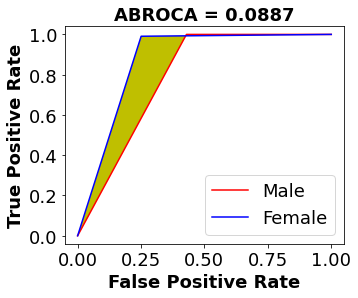

ABROCA: 0.08871386437844435


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.8161616161616161, 'accuracy': 0.8055555555555556, 'fairness': -0.2292169335380566, 'Positive_prot_pred': 0.7446808510638298, 'Positive_non_prot_pred': 0.5154639175257731, 'Negative_prot_pred': 0.2553191489361702, 'Negative_non_prot_pred': 0.4845360824742268}
Equal opportunity
{'balanced_accuracy': 0.8161616161616161, 'accuracy': 0.8055555555555556, 'fairness': 0.053846153846153766, 'TPR_protected': 0.8205128205128205, 'TPR_non_protected': 0.7666666666666667, 'TNR_protected': 0.625, 'TNR_non_protected': 0.8918918918918919}
Equalized odds
{'balanced_accuracy': 0.8161616161616161, 'accuracy': 0.8055555555555556, 'fairness': 0.32073804573804565, 'TPR_protected': 0.8205128205128205, 'TPR_non_protected': 0.7666666666666667, 'TNR_protected': 0.625, 'TNR_non_protected': 0.8918918918918919}
Predictive parity
{'balanced_accuracy': 0.8161616161616161, 'accuracy': 0.8055555555555556, 'fairness': 0.005714285714285783, 'TPR_protected': 0.8205128205128205, 

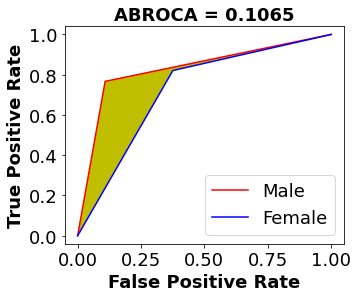

ABROCA: 0.10652286808936522


In [15]:
run_eval('xAPI-Edu')